<a href="https://colab.research.google.com/github/Olowookere-O-O/Python-for-RCT-and-Impact-Evaluation/blob/main/DAG_Causal_Path_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
## Packages
import pandas as pd
import numpy as np
import graphviz as gr

In [8]:
# Set seed for reproducibility
np.random.seed(42)
desired_mean = [0.575, 20.744, 0.074] ## Mean copied from the author
desired_std = [0.042, 2.013, 0.040] ## Std copied from the author
# Generate random data
num_rows = 323  # to match the provided DataFrame
gender = np.random.choice([0, 1], size=num_rows)
cross_sell_email = np.random.choice(['short', 'long', 'no_email'], size=num_rows)
age = np.random.normal(loc=desired_mean[1], scale=desired_std[1], size=num_rows)
conversion = np.random.normal(loc=desired_mean[2], scale=desired_std[2], size=num_rows)
data = pd.DataFrame({'gender': gender, 'cross_sell_email': cross_sell_email, 'age': age, 'conversion': conversion})


In [9]:
print(data)

     gender cross_sell_email        age  conversion
0         0             long  24.509163    0.015912
1         1             long  24.141978    0.106548
2         0             long  19.505511    0.013953
3         0         no_email  21.514575    0.063247
4         0         no_email  21.734680    0.056405
..      ...              ...        ...         ...
318       0            short  23.123314    0.054212
319       1            short  21.465000    0.045063
320       1             long  20.518599    0.103246
321       0            short  21.401090    0.091234
322       1            short  19.924821    0.083732

[323 rows x 4 columns]


In [25]:
## Drawing DAG path analysis
g_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"} ## LR helps to rank graph from left to right
                          )

In [22]:
g_cross_sell.edge("U", "conversion") ## Designing the nodes
g_cross_sell.edge("U", "age")
g_cross_sell.edge("U", "gender")

In [23]:
g_cross_sell.edge("rnd", "cross_sell_email")
g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("age", "conversion")
g_cross_sell.edge("gender", "conversion")

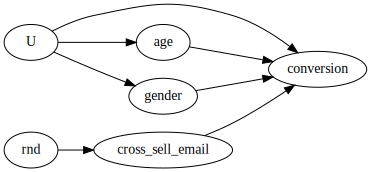

In [24]:
g_cross_sell

In [30]:
## Now since both age and gender are observables, let represent them with X
g_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"} ## LR helps to rank graph from left to right
                                          )

In [32]:
g_cross_sell.edge("U", "Conversion")

In [33]:
g_cross_sell.edge("U", "X")

In [34]:
g_cross_sell.edge("Cross_sell_email", "Conversion")
g_cross_sell.edge("X", "Conversion")

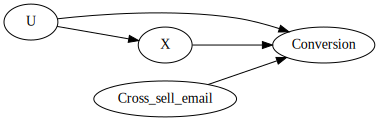

In [35]:
g_cross_sell

In [44]:
## Try writing your thesis mediation DAG
thesis_DAG = gr.Digraph(graph_attr={"rankdir": "LR"})

In [45]:
thesis_DAG.edge("ODA", "HO")
thesis_DAG.edge("ODA", "SP")
thesis_DAG.edge("SP", "HO")

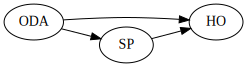

In [46]:
thesis_DAG

In [47]:
## More complicated causal chain
import networkx as nx

In [58]:
model_DAG = gr.Digraph(graph_attr={"rankdir": "LR"})
model_DAG.edge("C", "A")
model_DAG.edge("C", "B")
model_DAG.edge("B", "E")
model_DAG.edge("D", "A")
model_DAG.edge("A", "G")
model_DAG.edge("F", "E")

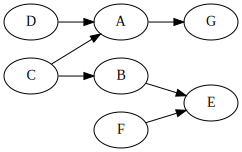

In [59]:
model_DAG

In [62]:
## Query relationship in python
model_DAG = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("B", "E"),
    ("D", "A"),
    ("A", "G"),
    ("F", "E")
])

In [53]:
print("Are D and C dependent?")

Are D and C dependent?


In [54]:
print(not(nx.d_separated(model_DAG, {"D"}, {"C"}, {}))) ## d_seperated is a logic statement of independence

False


In [57]:
print(not(nx.d_separated(model_DAG, {"D"}, {"C"}, {"A"}))) ## print("Are D and C dependent given A?")

True


In [65]:
print(not(nx.d_separated(model_DAG, {"D"}, {"C"}, {"G"}))) ## D and C independent given G. Note: Relatipnship flows in causal chain

True


In [66]:
print(not(nx.d_separated(model_DAG, {"G"}, {"F"}, {})))

False


In [68]:
print(not(nx.d_separated(model_DAG, {"G"}, {"F"}, {"E"}))) ## See your python note for detail

True


In [69]:
### PRACTICE ON CAUSAL ASSUMPTIONS
df = pd.DataFrame(dict(
             profits_prev_6m=[1.0, 1.0, 1.0, 5.0, 5.0, 5.0],
             consultancy=[0, 0, 1, 0, 1, 1],
             profits_next_6m=[1, 1.1, 1.2, 5.5, 5.7, 5.7],
         ))

In [71]:
df

,profits_prev_6m,consultancy,profits_next_6m
0,1.0,0,1.0
1,1.0,0,1.1
2,1.0,1,1.2
3,5.0,0,5.5
4,5.0,1,5.7
5,5.0,1,5.7


In [77]:
## Compare average of treatment and control group
(df.query("consultancy == 1")["profits_next_6m"].mean() - df.query("consultancy == 0")["profits_next_6m"].mean())

1.666666666666667

In [78]:
avg_df = (df
          .groupby(["consultancy", "profits_prev_6m"])
                   ["profits_next_6m"]
                   .mean())

In [79]:
avg_df

consultancy  profits_prev_6m
0            1.0                1.05
             5.0                5.50
1            1.0                1.20
             5.0                5.70
Name: profits_next_6m, dtype: float64

In [80]:
avg_df.loc[1] - avg_df.loc[0]

profits_prev_6m
1.0    0.15
5.0    0.20
Name: profits_next_6m, dtype: float64